### Ejercicio en Clase

Empleando la información del número de ocupados en miles de personas (Ocupados) para las 13 principales ciudades, encuentre el mejor pronóstico para los próximos 6 meses. Escriba un breve informe de máximo una página de texto que explique cómo llega a sus proyeccciones y presente las proyecciones. Aclare en el texto cuáles serían las limitaciones de sus pronósticos.

## 1. Carga de paquetes

In [3]:
import numpy as np
import pandas as pd # Operaciones con dataframes
from matplotlib import pyplot as plt # gráficos
from statsmodels.tsa.seasonal import seasonal_decompose # descomposición de series
from statsmodels.tsa.holtwinters import SimpleExpSmoothing  # Holwinters simple
from statsmodels.tsa.holtwinters import ExponentialSmoothing # Holwinters doble y tripe
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [4]:
# Configuración de gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo general (usa seaborn con fondo limpio)
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context('talk', font_scale=1.2)

# Configuración global de Matplotlib
plt.rcParams.update({
    'figure.figsize': (12, 6),
    'axes.titlesize': 18,
    'axes.titleweight': 'bold',
    'axes.titlepad': 15,
    'axes.labelsize': 13,
    'axes.labelcolor': 'black',
    'axes.edgecolor': 'gray',
    'axes.grid': True,
    'grid.alpha': 0.3,
    'grid.color': '#cccccc',
    'lines.linewidth': 2,  # grosor de las líneas
    'font.family': 'sans-serif',
    'font.sans-serif': ['DejaVu Sans'],
    'legend.frameon': False,
    'legend.fontsize': 12,
    'legend.loc': 'upper right',
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'xtick.color': 'black',
    'ytick.color': 'black',
    'axes.prop_cycle': plt.cycler(color=[
        '#007acc', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'
    ])  # paleta de colores corporativa
})

# Tema de seaborn adicional
sns.set_style("whitegrid")

## 2. Carga de datos

In [5]:
data = pd.read_excel("https://raw.githubusercontent.com/profedaniel86/Series_de_Tiempo/refs/heads/main/1.Intro/datosEmpleo.xlsx",index_col='mes',parse_dates=True)
data.head()

,TD_13ciudades,Ocupados,Desocupados,Inactivos
mes,,,,
2001-01-01,20.946380,6923.604,1834.507,4600.718
2001-02-01,19.894213,7037.746,1747.820,4596.805
2001-03-01,19.221565,6945.973,1652.823,4807.120
2001-04-01,17.888575,6973.079,1519.137,4937.280
2001-05-01,17.945654,6994.462,1529.720,4928.911


In [6]:
data.tail()

,TD_13ciudades,Ocupados,Desocupados,Inactivos
mes,,,,
2019-02-01,12.427409,10557.917,1498.272,6264.403
2019-03-01,11.975098,10760.776,1463.919,6116.140
2019-04-01,11.144286,10632.028,1333.469,6395.575
2019-05-01,11.500000,10813.000,1369.000,6199.000
2019-06-01,10.700000,10848.000,1306.000,6247.000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 222 entries, 2001-01-01 to 2019-06-01
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TD_13ciudades  222 non-null    float64
 1   Ocupados       222 non-null    float64
 2   Desocupados    222 non-null    float64
 3   Inactivos      222 non-null    float64
dtypes: float64(4)
memory usage: 8.7 KB


In [8]:
data.describe()

,TD_13ciudades,Ocupados,Desocupados,Inactivos
count,222.000000,222.000000,222.000000,222.000000
mean,12.601883,9160.852009,1290.681131,5500.277973
std,2.808235,1295.492800,181.948810,389.227213
min,8.140713,6923.604000,857.491000,4596.805000
25%,10.396078,7971.103000,1152.874750,5308.814750
50%,11.925036,9139.064500,1270.201000,5533.044500
75%,14.087588,10458.510250,1398.899250,5752.608500
max,20.946380,11037.199000,1834.507000,6395.575000


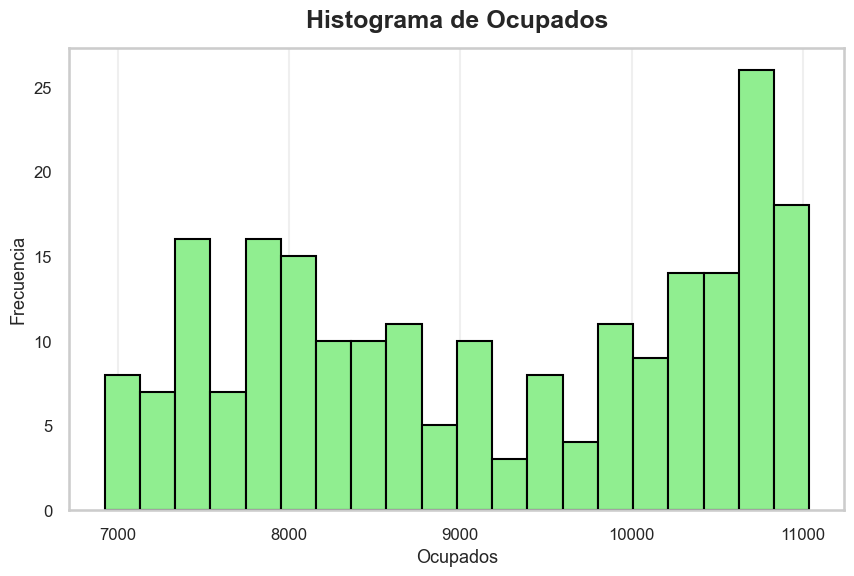

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(data["Ocupados"], bins=20, color='lightgreen', edgecolor='black')
plt.title("Histograma de Ocupados")
plt.xlabel("Ocupados")
plt.ylabel("Frecuencia")
plt.grid(axis='y')
plt.show()

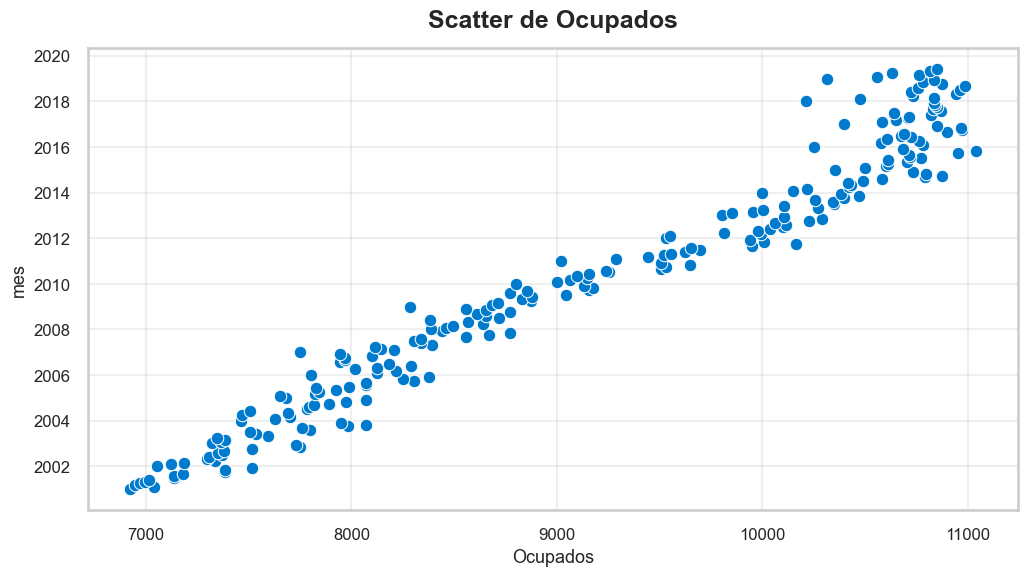

In [10]:
# Scatter plot: mes vs ocupados
sns.scatterplot(x="Ocupados", y="mes", data=data)
plt.title("Scatter de Ocupados")
plt.show()

(222, 4)


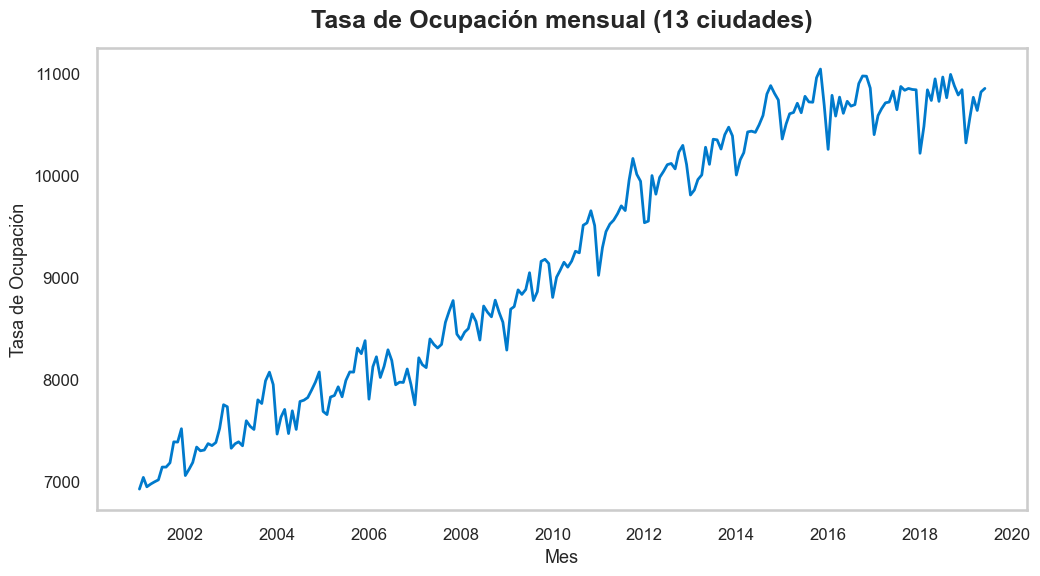

In [11]:
# imprimiendo el tamano del dataframe
print(data.shape)

# Graficando los datos
plt.title("Tasa de Ocupación mensual (13 ciudades)")
plt.xlabel("Mes")
plt.ylabel("Tasa de Ocupación")
plt.plot(data[["Ocupados"]])
plt.grid()
plt.show()

## 3. Encontrando los componentes de una serie de tiempo

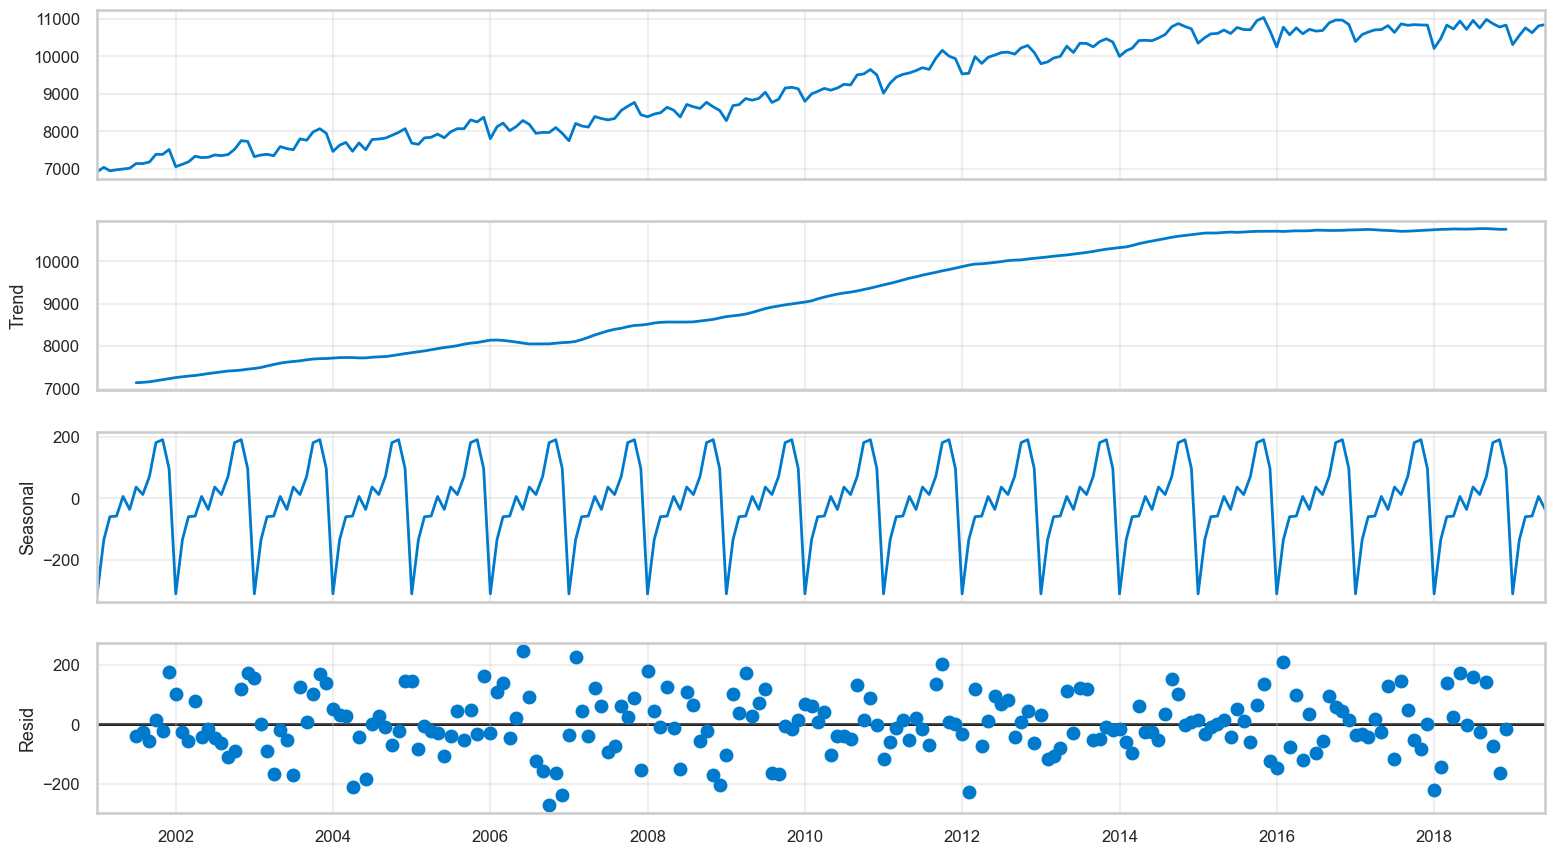

In [12]:
to_componentes = seasonal_decompose(data[["Ocupados"]],model="additive")
fig = to_componentes.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()
plt.show()

In [13]:
to_componentes.seasonal
#td_componentes.trend
#td_componentes.resid

mes
2001-01-01   -310.570069
2001-02-01   -134.331549
2001-03-01    -59.585841
2001-04-01    -57.385905
2001-05-01      6.435912
                 ...    
2019-02-01   -134.331549
2019-03-01    -59.585841
2019-04-01    -57.385905
2019-05-01      6.435912
2019-06-01    -35.859993
Name: seasonal, Length: 222, dtype: float64

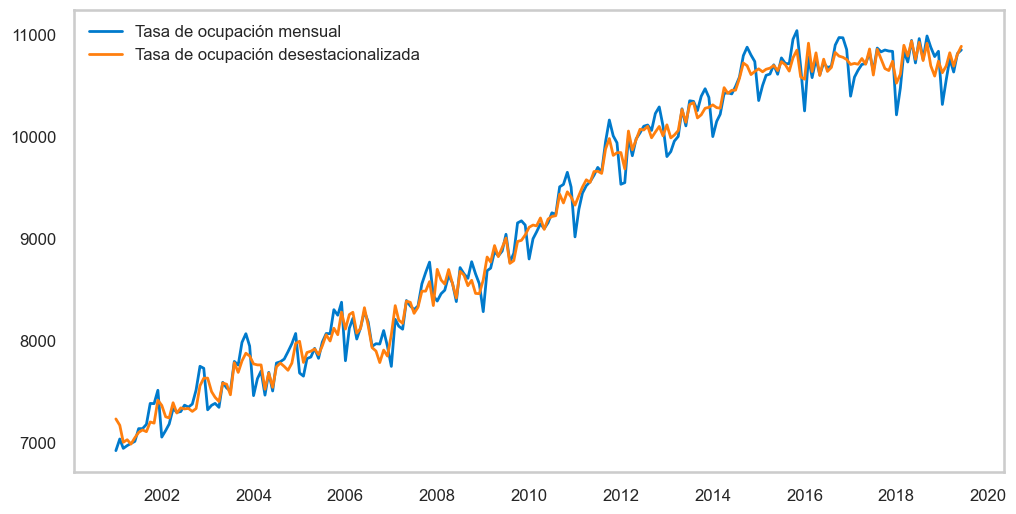

In [14]:
# Desestacionalizar
to_desestacionalizada = data["Ocupados"]-to_componentes.seasonal

plt.plot(data[["Ocupados"]],label="Tasa de ocupación mensual")
plt.plot(to_desestacionalizada,label="Tasa de ocupación desestacionalizada")
plt.legend(loc= "upper left")
plt.grid()
plt.show()

## 4. Pronosticando metodos de suavización

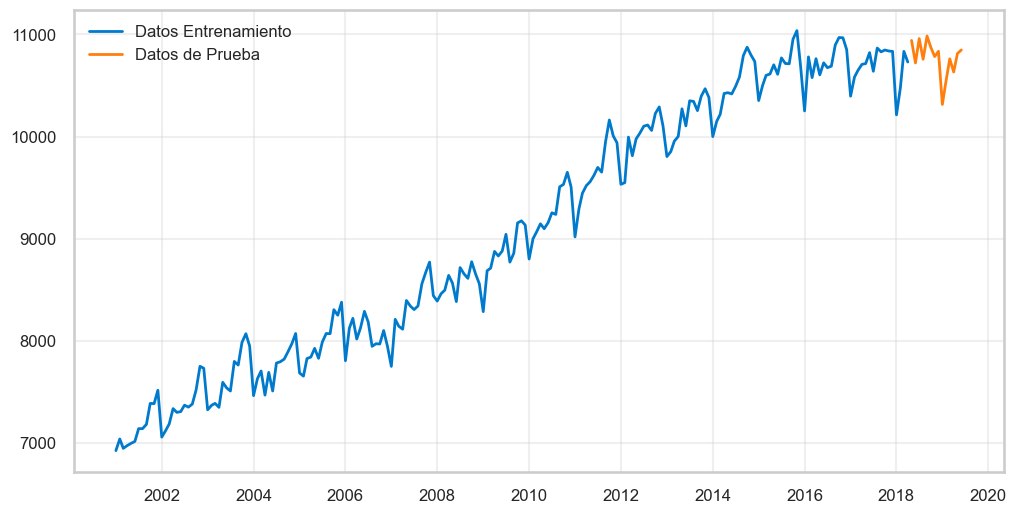

In [15]:
train_len = 208
train_to = data[["Ocupados"]][:train_len]
test_to = data[["Ocupados"]][train_len:]

fig = plt.figure(figsize=(12, 6))
plt.plot(train_to,label="Datos Entrenamiento")
plt.plot(test_to,label="Datos de Prueba")
plt.legend(loc= "upper left")
plt.show()

In [16]:
train_to

,Ocupados
mes,
2001-01-01,6923.604
2001-02-01,7037.746
2001-03-01,6945.973
2001-04-01,6973.079
2001-05-01,6994.462
...,...
2017-12-01,10834.330
2018-01-01,10212.612
2018-02-01,10476.311


In [17]:
test_to

,Ocupados
mes,
2018-05-01,10941.294
2018-06-01,10720.946
2018-07-01,10959.197
2018-08-01,10756.782
2018-09-01,10984.928
2018-10-01,10874.338
2018-11-01,10783.299
2018-12-01,10835.398
2019-01-01,10314.438


## 4.1 Promedio movil

In [18]:
## Considerando el dato actual. Números 2,3,4,5 ventanas (datos del más cercano al más lejano para predecir)
ma_2= train_to.rolling(2,min_periods=2).mean()
ma_3= train_to.rolling(3,min_periods=2).mean()
ma_4= train_to.rolling(4,min_periods=2).mean()
ma_5= train_to.rolling(5,min_periods=2).mean()
ma_6= train_to.rolling(6,min_periods=2).mean()

In [19]:
## Sin considerar el dato actual, por si el periodo no ha finalizado. Preguntar ¿Cuándo debe correr el modelo?
ma_2= train_to.shift().rolling(2,min_periods=2).mean()
ma_3= train_to.shift().rolling(3,min_periods=2).mean()
ma_4= train_to.shift().rolling(4,min_periods=2).mean()
ma_5= train_to.shift().rolling(5,min_periods=2).mean()
ma_6= train_to.shift().rolling(6,min_periods=2).mean()

In [20]:
#Función para tener en cuenta el nuevo promedio con el anterior para realizar el pronóstico. Considerar el forecast que estoy generando.
def fore_ma(datos,w,h):
  data=datos.copy()
  for x in range(1,h+1):
    ind = data.index[-1]
    value = ind + pd.DateOffset(months=1)
    data.loc[value]= data[-w:].mean()
  return data[-h:]

In [21]:
# Ventana (2,3,4,5) y cantidad de pronósticos que voy a generar (14).
ma_2_f= fore_ma(train_to,2,14)
ma_3_f= fore_ma(train_to,3,14)
ma_4_f= fore_ma(train_to,4,14)
ma_5_f= fore_ma(train_to,5,14)
ma_6_f= fore_ma(train_to,6,14)

In [22]:
test_to

,Ocupados
mes,
2018-05-01,10941.294
2018-06-01,10720.946
2018-07-01,10959.197
2018-08-01,10756.782
2018-09-01,10984.928
2018-10-01,10874.338
2018-11-01,10783.299
2018-12-01,10835.398
2019-01-01,10314.438


In [23]:
ma_2_f

,Ocupados
mes,
2018-05-01,10781.978500
2018-06-01,10755.977750
2018-07-01,10768.978125
2018-08-01,10762.477937
2018-09-01,10765.728031
2018-10-01,10764.102984
2018-11-01,10764.915508
2018-12-01,10764.509246
2019-01-01,10764.712377


In [24]:
# Seleccionar métrica más baja.
rmse_ma_2 = np.sqrt(mean_squared_error(test_to,ma_2_f ))
rmse_ma_3 = np.sqrt(mean_squared_error(test_to,ma_3_f ))
rmse_ma_4 = np.sqrt(mean_squared_error(test_to,ma_4_f ))
rmse_ma_5 = np.sqrt(mean_squared_error(test_to,ma_5_f ))
rmse_ma_6 = np.sqrt(mean_squared_error(test_to,ma_6_f ))

In [25]:
print( rmse_ma_2, rmse_ma_3 ,rmse_ma_4 ,rmse_ma_5, rmse_ma_6)

169.18787998664087 181.43863900870895 212.78442787721826 217.05424156373658 213.32581194668012


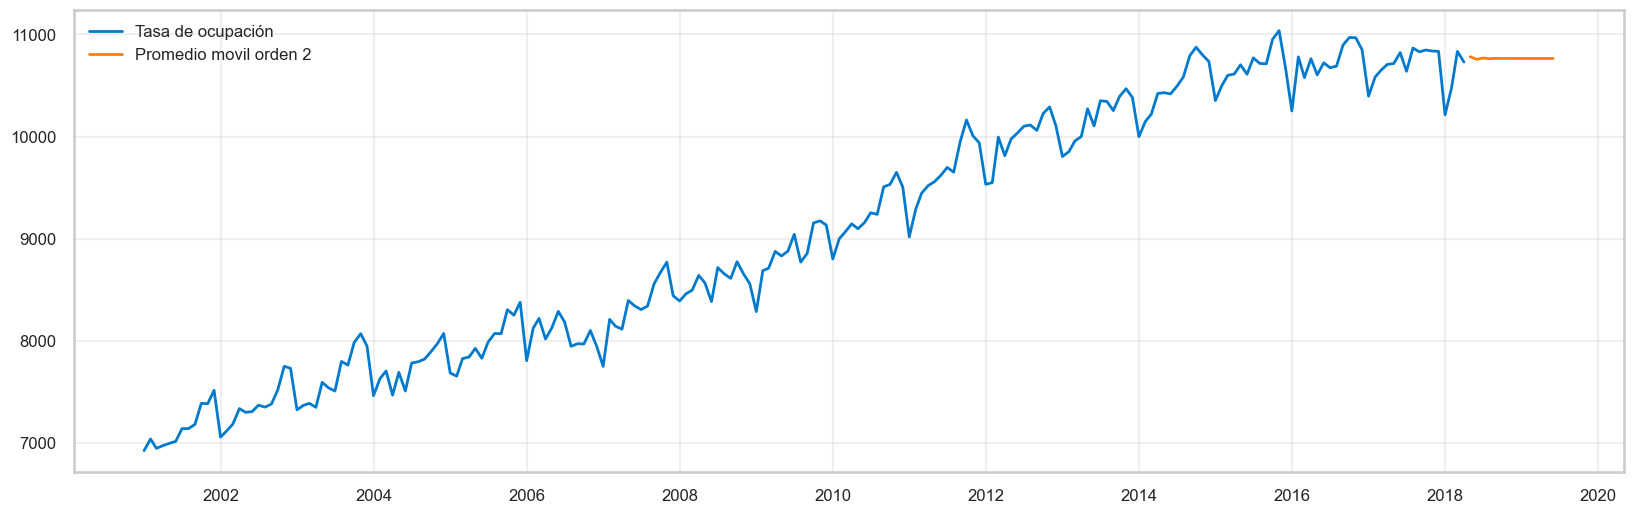

In [26]:
fig = plt.figure(figsize=(20, 6))
plt.plot(train_to,label="Tasa de ocupación")
plt.plot(ma_2_f,label="Promedio movil orden 2")
plt.legend(loc= "upper left")
plt.show()

## 4.2 Suavizacion Exponencial Simple

In [27]:
# Build model.
ets_model = ETSModel(endog=train_to["Ocupados"],error="add")#,trend="add",seasonal="mul" )
ets_result = ets_model.fit()

point_forecast=ets_result.forecast(14)

ci = ets_result.get_prediction(start = point_forecast.index[0],
                                end = point_forecast.index[-1])

conf_forecast = ci.pred_int(alpha=0.05)#.iloc[:,0]
limits = ci.predicted_mean


preds = pd.concat([limits, conf_forecast], axis = 1)
preds.columns = ['Point_forecast', 'lower_95', 'upper_95']
print(preds)

            Point_forecast      lower_95      upper_95
2018-05-01    10720.369526  10363.683813  11077.055240
2018-06-01    10720.369526  10295.289553  11145.449500
2018-07-01    10720.369526  10236.467399  11204.271654
2018-08-01    10720.369526  10184.058465  11256.680587
2018-09-01    10720.369526  10136.333706  11304.405347
2018-10-01    10720.369526  10092.224539  11348.514513
2018-11-01    10720.369526  10051.015801  11389.723252
2018-12-01    10720.369526  10012.200976  11428.538077
2019-01-01    10720.369526   9975.405782  11465.333271
2019-02-01    10720.369526   9940.344356  11500.394696
2019-03-01    10720.369526   9906.792516  11533.946536
2019-04-01    10720.369526   9874.570593  11566.168460
2019-05-01    10720.369526   9843.531958  11597.207095
2019-06-01    10720.369526   9813.555098  11627.183955


c:\Users\COORD.MED\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


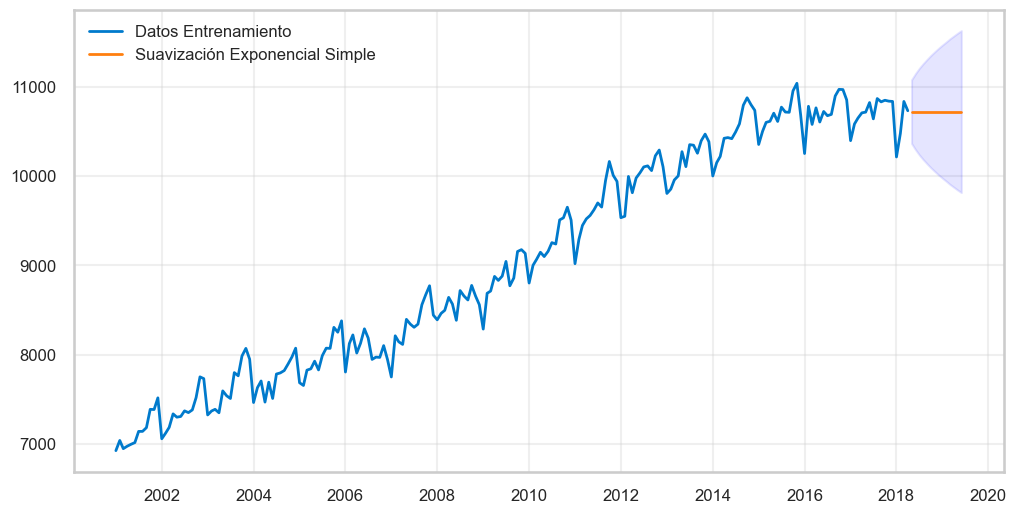

In [28]:
fig = plt.figure(figsize=(12, 6))
plt.plot(train_to,label="Datos Entrenamiento")
plt.plot(preds['Point_forecast'],label="Suavización Exponencial Simple")
plt.fill_between(preds.index ,preds['lower_95'], preds['upper_95'], color='blue', alpha=0.1)
plt.legend(loc= "upper left")
plt.show()

In [29]:
ets_result.alpha

np.float64(0.6482796866258126)

In [30]:
rmse = np.sqrt(mean_squared_error(test_to,point_forecast ))
print(rmse)

177.99269831796994


## 4.3 Suavizacion Exponencial Lineal (Holt)

In [31]:
# Build model.
ets_model = ETSModel(endog=train_to["Ocupados"],error="mul",trend="mul")#,seasonal="mul" )
ets_result = ets_model.fit()

point_forecast=ets_result.forecast(14)

ci = ets_result.get_prediction(start = point_forecast.index[0],
                                end = point_forecast.index[-1])

conf_forecast = ci.pred_int(alpha=0.05)#.iloc[:,0]
limits = ci.predicted_mean


preds_holt = pd.concat([limits, conf_forecast], axis = 1)
preds_holt.columns = ['Point_forecast', 'lower_95', 'upper_95']
print(preds_holt)

            Point_forecast      lower_95      upper_95
2018-05-01    10749.538825  10364.064861  11168.444815
2018-06-01    10773.218913  10306.703484  11243.852263
2018-07-01    10796.951166  10306.499227  11348.956911
2018-08-01    10820.735699  10255.315572  11475.531375
2018-09-01    10844.572627  10251.712327  11486.816625
2018-10-01    10868.462065  10256.206321  11541.161306
2018-11-01    10892.404128  10168.277823  11637.317259
2018-12-01    10916.398934  10230.345132  11712.844198
2019-01-01    10940.446597  10188.858740  11693.595187
2019-02-01    10964.547235  10116.431604  11815.326949
2019-03-01    10988.700964  10124.446852  11849.190154
2019-04-01    11012.907901  10124.494586  11918.447368
2019-05-01    11037.168164  10091.442632  12048.874261
2019-06-01    11061.481869  10159.642389  12119.649860


c:\Users\COORD.MED\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


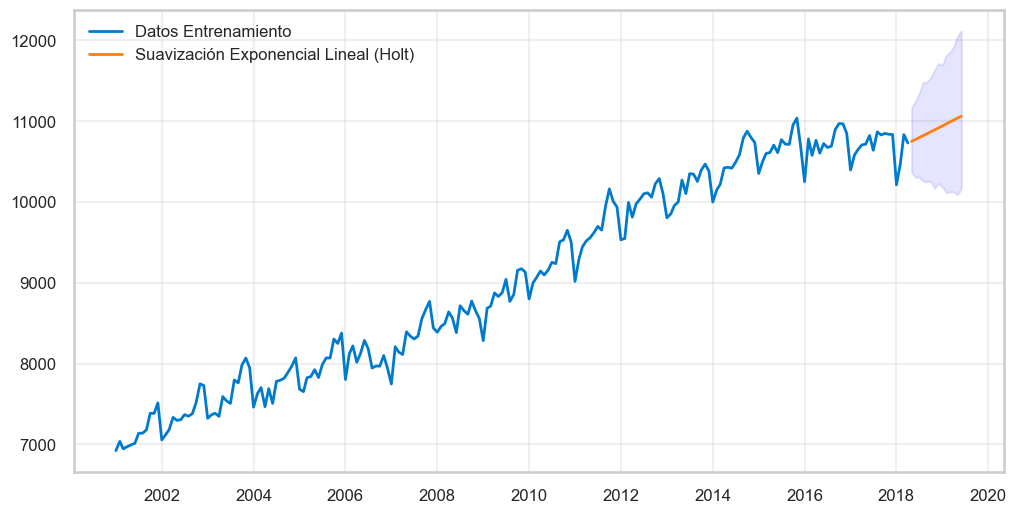

In [32]:
fig = plt.figure(figsize=(12, 6))
plt.plot(train_to,label="Datos Entrenamiento")
plt.plot(preds_holt['Point_forecast'],label="Suavización Exponencial Lineal (Holt)")
plt.fill_between(preds_holt.index ,preds_holt['lower_95'], preds_holt['upper_95'], color='blue', alpha=0.1)
plt.legend(loc= "upper left")
plt.show()

In [33]:
print(ets_result.alpha,ets_result.beta)

0.5619343685836977 5.619343685836977e-05


In [34]:
rmse_holt = np.sqrt(mean_squared_error(test_to,preds_holt['Point_forecast']))
print(rmse_holt)

261.61525763126434


## 4.3 Suavizacion Exponencial Lineal de Winters (Holt-Winters)

In [35]:
# Build model
ets_model = ETSModel(endog=train_to["Ocupados"],error="add",trend="add",seasonal="add" )
ets_result = ets_model.fit()

point_forecast=ets_result.forecast(14)

ci = ets_result.get_prediction(start = point_forecast.index[0],
                                end = point_forecast.index[-1])

conf_forecast = ci.pred_int(alpha=0.05)#.iloc[:,0]
limits = ci.predicted_mean


preds_hw_add = pd.concat([limits, conf_forecast], axis = 1)
preds_hw_add.columns = ['Point_forecast', 'lower_95', 'upper_95']
print(preds_hw_add)

            Point_forecast      lower_95      upper_95
2018-05-01    10778.693831  10522.795803  11034.591859
2018-06-01    10842.441207  10571.495210  11113.387204
2018-07-01    10833.170337  10547.966460  11118.374215
2018-08-01    10942.105206  10643.320408  11240.890004
2018-09-01    10997.495290  10685.718054  11309.272527
2018-10-01    11095.849060  10771.597120  11420.101000
2018-11-01    11114.796845  10778.530310  11451.063380
2018-12-01    11011.820263  10663.951565  11359.688960
2019-01-01    10524.729944  10165.631538  10883.828350
2019-02-01    10802.750553  10432.760976  11172.740130
2019-03-01    10952.750130  10572.178855  11333.321404
2019-04-01    10962.102529  10571.233894  11352.971163
2019-05-01    10997.226584  10570.344330  11424.108838
2019-06-01    11060.973960  10624.882882  11497.065038


c:\Users\COORD.MED\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


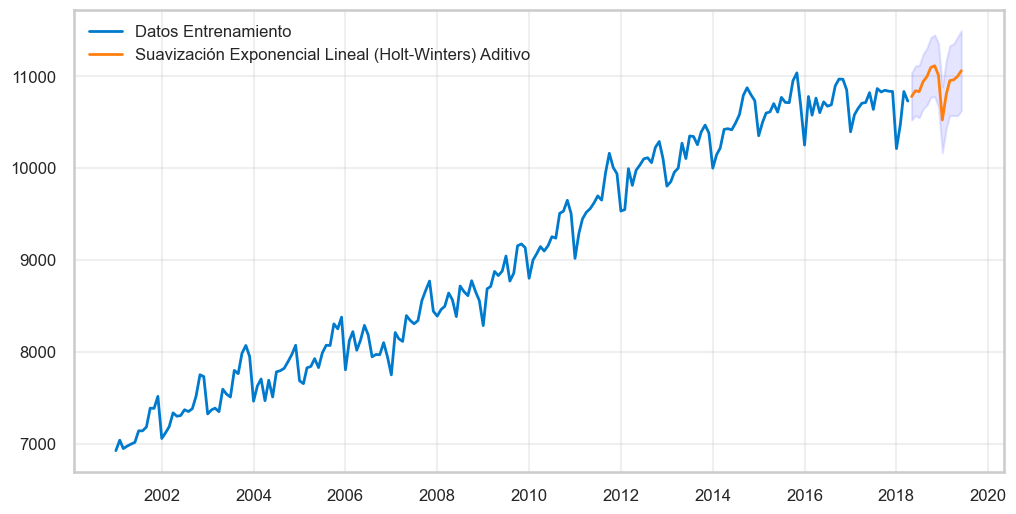

In [36]:
fig = plt.figure(figsize=(12, 6))
plt.plot(train_to,label="Datos Entrenamiento")
plt.plot(preds_hw_add['Point_forecast'],label="Suavización Exponencial Lineal (Holt-Winters) Aditivo")
plt.fill_between(preds_hw_add.index ,preds_hw_add['lower_95'], preds_hw_add['upper_95'], color='blue', alpha=0.1)
plt.legend(loc= "upper left")
plt.show()

In [37]:
print(ets_result.alpha,ets_result.beta,ets_result.gamma)

0.3479121635419951 3.4791216354199516e-05 0.3222910502092631


In [38]:
rmse_hw_add = np.sqrt(mean_squared_error(test_to,preds_hw_add['Point_forecast']))
print(rmse_hw_add)

208.89758362797713


In [39]:
# Build model. Se elimina la tendencia ya que no se encuentra muy marcada hacie el final de los datos y el modelo funciona mejor.
ets_model = ETSModel(endog=train_to["Ocupados"],error="add",trend=None,seasonal="add" , )
ets_result = ets_model.fit()

point_forecast=ets_result.forecast(14)

ci = ets_result.get_prediction(start = point_forecast.index[0],
                                end = point_forecast.index[-1])

conf_forecast = ci.pred_int(alpha=0.05)#.iloc[:,0]
limits = ci.predicted_mean


preds_hw_mul = pd.concat([limits, conf_forecast], axis = 1)
preds_hw_mul.columns = ['Point_forecast', 'lower_95', 'upper_95']
print(preds_hw_mul)

            Point_forecast      lower_95      upper_95
2018-05-01    10768.145507  10500.140269  11036.150746
2018-06-01    10823.247526  10525.450839  11121.044214
2018-07-01    10791.606941  10466.739389  11116.474494
2018-08-01    10890.916780  10541.066833  11240.766728
2018-09-01    10913.739521  10540.575957  11286.903084
2018-10-01    10985.485576  10590.381660  11380.589493
2018-11-01    10982.374565  10566.486161  11398.262968
2018-12-01    10854.370152  10418.687672  11290.052632
2019-01-01    10340.419560   9885.804026  10795.035093
2019-02-01    10613.005167  10140.214153  11085.796180
2019-03-01    10749.626432  10259.333252  11239.919611
2019-04-01    10739.318694  10232.126954  11246.510434
2019-05-01    10768.145507  10217.188249  11319.102765
2019-06-01    10823.247526  10257.199861  11389.295192


c:\Users\COORD.MED\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


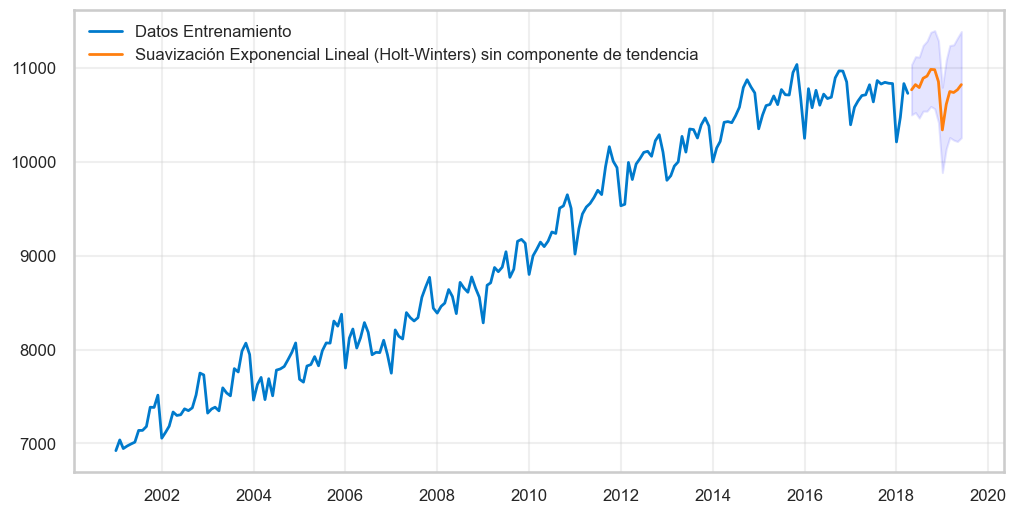

In [40]:
fig = plt.figure(figsize=(12, 6))
plt.plot(train_to,label="Datos Entrenamiento")
plt.plot(preds_hw_mul['Point_forecast'],label="Suavización Exponencial Lineal (Holt-Winters) sin componente de tendencia")
plt.fill_between(preds_hw_mul.index ,preds_hw_mul['lower_95'], preds_hw_mul['upper_95'], color='blue', alpha=0.1)
plt.legend(loc= "upper left")
plt.show()

In [41]:
print(ets_result.alpha,ets_result.gamma)

0.48443414155182074 0.3185300294311702


In [42]:
rmse_hw_mul = np.sqrt(mean_squared_error(test_to,preds_hw_mul['Point_forecast']))
print(rmse_hw_mul)

107.53974025773036


## Se ajusta el modelo con el train y se observan los hiperparametros obtenidos en la optimización y se realizan los pronósticos

In [43]:
ets_model = ETSModel(endog=train_to["Ocupados"],error="add",trend=None,seasonal="add" , )
ets_result = ets_model.fit()

c:\Users\COORD.MED\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [44]:
## Se obtienen los hiperparametros

print(ets_result.alpha)
#print(ets_result.beta)
print(ets_result.gamma)
print(ets_result.param_names)

0.48443414155182074
0.3185300294311702
['smoothing_level', 'smoothing_seasonal', 'initial_level', 'initial_seasonal.0', 'initial_seasonal.1', 'initial_seasonal.2', 'initial_seasonal.3', 'initial_seasonal.4', 'initial_seasonal.5', 'initial_seasonal.6', 'initial_seasonal.7', 'initial_seasonal.8', 'initial_seasonal.9', 'initial_seasonal.10', 'initial_seasonal.11']


In [ ]:
## Modelo ETS sin tendencia
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
import pandas as pd

# Ajuste del modelo final sin tendencia
final_model = ETSModel(
    endog=data["Ocupados"],
    error="add",
    trend=None,            # 🔸 Sin tendencia
    seasonal="add",         # Componente estacional aditiva
    seasonal_periods=12     # Periodicidad mensual
)

# Entrenamiento con parámetros fijados
final_model_fit = final_model.fit_constrained({
    'smoothing_level': 0.6028090525671199,
    'smoothing_seasonal': 3.971909474328801e-05
})

# Coeficientes del modelo
print("Alpha:", final_model_fit.alpha)
print("Gamma (estacional):", final_model_fit.gamma)

# Pronóstico a 6 periodos
point_forecast = final_model_fit.forecast(6)

# Intervalos de confianza
ci = final_model_fit.get_prediction(
    start=point_forecast.index[0],
    end=point_forecast.index[-1]
)

conf_forecast = ci.pred_int(alpha=0.05)
limits = ci.predicted_mean

# Unir en tabla final
preds_hw_add = pd.concat([limits, conf_forecast], axis=1)
preds_hw_add.columns = ['Point_forecast', 'lower_95', 'upper_95']

print(preds_hw_add)



Alpha: 0.6028090525671199
Gamma (estacional): 3.971909474328801e-05
            Point_forecast      lower_95      upper_95
2019-07-01    10879.745288  10650.829974  11108.660601
2019-08-01    10853.735048  10586.444805  11121.025292
2019-09-01    10913.525664  10612.716874  11214.334453
2019-10-01    11023.375297  10692.425480  11354.325115
2019-11-01    11033.288861  10674.722778  11391.854943
2019-12-01    10940.043877  10555.841470  11324.246283


c:\Users\COORD.MED\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


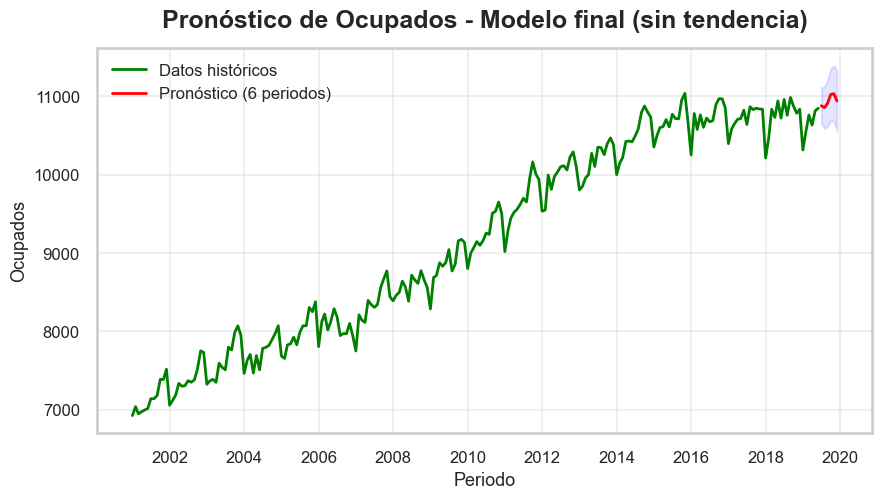

In [51]:
plt.figure(figsize=(10,5))
plt.plot(data["Ocupados"], label="Datos históricos", color="green")
plt.plot(point_forecast, label="Pronóstico (6 periodos)", color="red", linestyle="-")

# Alinear los IC con las fechas del pronóstico
plt.fill_between(preds_hw_add.index, preds_hw_add['lower_95'], preds_hw_add['upper_95'], color='blue', alpha=0.1)

plt.title("Pronóstico de Ocupados - Modelo final (sin tendencia)")
plt.xlabel("Periodo")
plt.ylabel("Ocupados")
plt.legend(loc="upper left")
plt.grid(alpha=0.3)
plt.show()
